# Fashion MNIST - Convolutional Neural Network ver.2
- Conv2D 2개
- MaxPulling 1개


In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_class_train), (X_test, Y_class_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


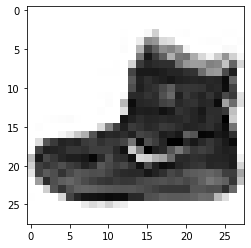

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# 0 ~ 1 사이의 값으로 정규화
X_train = X_train / 255.0
X_train.shape

(60000, 28, 28, 1)

In [7]:
X_test = X_test / 255.0
type(X_test[0,0])

numpy.ndarray

In [8]:
Y_class_train[0]

9

In [9]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### 모델 정의, 설정, 학습

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [11]:
model = Sequential([
                    Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(pool_size=2),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 4,743,050
Trainable params: 4,743,050
Non-trainable params: 0
______________________________________________

In [12]:
# 모델 실행환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [14]:
# 모델 최적화 설정
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1,save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [15]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[checkpointer, early_stopping])


Epoch 00001: val_loss improved from inf to 0.31531, saving model to ./model/best001-0.3153.hdf5

Epoch 00002: val_loss improved from 0.31531 to 0.26334, saving model to ./model/best002-0.2633.hdf5

Epoch 00003: val_loss improved from 0.26334 to 0.24268, saving model to ./model/best003-0.2427.hdf5

Epoch 00004: val_loss improved from 0.24268 to 0.22253, saving model to ./model/best004-0.2225.hdf5

Epoch 00005: val_loss did not improve from 0.22253

Epoch 00006: val_loss did not improve from 0.22253

Epoch 00007: val_loss did not improve from 0.22253

Epoch 00008: val_loss did not improve from 0.22253

Epoch 00009: val_loss did not improve from 0.22253

Epoch 00010: val_loss did not improve from 0.22253

Epoch 00011: val_loss did not improve from 0.22253

Epoch 00012: val_loss did not improve from 0.22253

Epoch 00013: val_loss did not improve from 0.22253

Epoch 00014: val_loss did not improve from 0.22253


In [16]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best004-0.2225.hdf5')

In [17]:
acc = best_model.evaluate(X_test, Y_test, verbose=2)[1]
print(f"\n Test Accuracy: {acc:.4f}")

313/313 - 1s - loss: 0.2368 - accuracy: 0.9118

 Test Accuracy: 0.9118


In [18]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

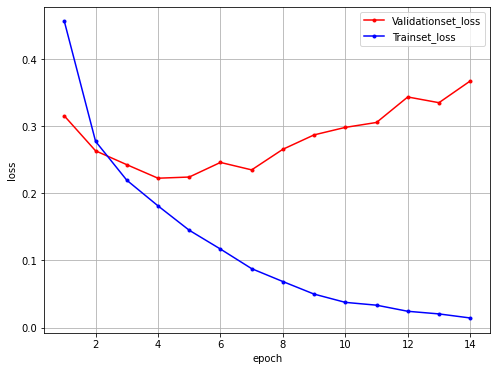

In [19]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()